# Assignment 1: Problem Statement

**Submission Date:** End of Day September 1, 2024

Use this partial dataset (sourced from Kaggle) which contains research articles related to COVID-19. This corpus has around 56,000+ files. In this assignment, you will perform a set of tasks as given below.

## Tasks

1. **Extract the text content from the JSON-encoded dataset** and create a text corpus. You may use any JSON library to extract the text. (2 marks)
2. **Develop your pre-processing steps** (case-folding, removal of numbers, etc.) and order of steps. (5 marks)
3. **Find the weighted term frequency** for every word in the corpus and order it according to its rank using Zipf’s Law. Find the value of the α using the data obtained from the previous step. (8 marks)
4. **Print the number of tokens and the vocabulary.** (5 marks)
5. **Plot Tokens Vs Vocabulary graph using Heaps’ empirical law.** Find vocabulary count for every 10,000 tokens. You may use a log scale for plotting. (5 marks)

### Note

1. To start with, try your program with a smaller corpus. You may proceed to extract all the content and perform the tasks to complete the assignment once your trial run is successful.
2. Use Colab to submit your assignments. Learn all the tricks of Colab from the web, especially how to read remote files.
3. Share the final version of your assignments with the following email IDs:
   - ramaseshan.nlp@gmail.com
   - ambaye.om.cmi@gmail.com
   - vergil167867@gmail.com
   - rohitatcmi@gmail.com

### Naming Conventions for the Python Notebooks (pynb)

- The first part of the filename should be your First name.
- The second part of the filename should be your roll number.
- The third part of your assignment should be Assignment0X, where X is the assignment number.

**Example:** `SriramBMC202204_Assignment01.ipynb`

**Note:** We will not evaluate files with an arbitrary file name.

4. Write your official name at the beginning of the Python notebook.
5. Python notebooks should be available on the Colab platform (Google).
6. **DO NOT** send the Python notebook as an attachment to the shared email IDs.
7. **DO NOT** modify the code/results after the deadline.
8. Make sure that all the results are available when you share the assignments. Incomplete Python notebooks will not be evaluated.
9. We will **NOT** run/change your Python notebook.
10. Follow the **PEP-8** coding style.
11. Use the **functional-style of coding**.
12. Use the **multiprocessing library** of Python wherever necessary.
13. Write at least **1-3 lines of comments for every function**.
14. You may use **NLTK or SpaCy** library to pre-process the text. Do not use lemmatize or stemming functions to remove inflections.
15. You may use **regex libraries** to remove unwanted words/patterns from the corpus.
16. Keep the processed corpus safe. You may create a large single file or multiple text files. It/they will be useful for future assignments.
17. **Optional:** You may use GitHub to store your versions of the assignment.
    - **Advantages:** You will never lose your code if you check it into the GitHub repository.

### Sample Code

**Extracting content from JSON formatted text:**

```python
import json

def json2text(filename):
    file = open(filename)
    paper_content = json.load(file)
    body_text = ""
    abstract = ""
    title = ""
    # Get the paper_id
    paper_id = paper_content['paper_id']
    if 'title' in paper_content:
        title = paper_content['title']
    # Get the abstract
    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract = abstract + abs['text']
    # Get the paper body text
    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text = body_text + bt['text']
    return (f'{title} {abstract} {body_text}').lower()


### Parallel Write

```python
import os
import multiprocessing as mp
from multiprocessing import Pool

def write_file(filename):
    with open(filename, 'r') as fd:
        json2text(filename)

def par_write(files):
    '''Read chunk of files and let the cores of your machine
    do the job of format conversion in parallel'''
    # parameter: files - list of files from a folder
    
    cpu_count = os.cpu_count()
    
    p = Pool(processes=cpu_count)
    p.map(write_file, files, chunksize=16)
    p.close()


In [ ]:
import json
import zipfile
import os
import multiprocessing as mp
from multiprocessing import Pool
import shutil
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from math import log
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Get the list of stopwords for English
stop_words = set(stopwords.words('english'))

print(stop_words)

{'very', 'm', "couldn't", 'be', 'the', "mustn't", "won't", 'most', 'should', 've', 'won', 'her', "aren't", 'about', 'himself', 'an', 'he', 'll', 'needn', 'off', 'aren', 'a', 'those', "wasn't", 'after', 'into', "it's", 'than', "don't", 'not', 'yourselves', 'doing', 'so', "you'll", 'hasn', 'does', 'while', 'ain', 'mustn', 'just', 'ma', 'myself', 'it', 'other', 'between', 'his', 'who', 'then', 'from', 'under', 'own', 'few', 'haven', 'has', 'until', 'they', 'before', 'will', 'that', 'o', "she's", 'isn', "you'd", 'again', 'same', 'why', "you're", 'this', 'wasn', 'theirs', 'my', 'doesn', 'which', 'yourself', 'there', 'herself', 'having', 'on', 'whom', 'don', 'only', 'can', "should've", 'during', "wouldn't", 'against', 'nor', 'themselves', 'any', "mightn't", 'above', 'to', 'out', 're', 'these', 'more', 'we', 't', 'y', 'ours', 'where', 'wouldn', 'itself', 'once', 'when', "haven't", 'had', 'as', 'is', 'because', "needn't", 'here', "hadn't", 'your', 'him', 'in', 'them', 'have', 'some', 'both', "

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

##Functions

In [ ]:
def json2text(filepath):
    try:
        # Check if the file is a JSON file by its extension
        if not filepath.endswith('.json'):
            raise ValueError("Not a JSON file")

        with open(filepath, 'r', encoding='utf-8') as file:
            # Check if the file is empty
            content = file.read().strip()
            if not content:
                raise ValueError("Empty file")
            # Try to load the JSON content
            paper_content = json.loads(content)
    except (UnicodeDecodeError, json.JSONDecodeError, ValueError) as e:
        print(f"Error reading {filepath}: {e}")
        return ""  # Return an empty string or handle the error as needed

    body_text = ""
    abstract = ""
    title = ""

    # Get the paper_id
    paper_id = paper_content.get('paper_id', '')

    if 'title' in paper_content:
        title = paper_content['title']

    if 'abstract' in paper_content:
        for abs in paper_content['abstract']:
            abstract += abs['text']

    if 'body_text' in paper_content:
        for bt in paper_content['body_text']:
            body_text += bt['text']

    return (f'{title} {abstract} {body_text}').lower()

In [ ]:
# Updated write_file function to pass the filename path to json2text
def write_file(filename):
    file_path = os.path.join(correct_dir_path, filename)
    text_content = json2text(file_path)
    if text_content:
        # Save the processed content to a new file
        output_dir = '/content/processed_texts'
        os.makedirs(output_dir, exist_ok=True)

        output_file_path = os.path.join(output_dir, f"{os.path.splitext(filename)[0]}.txt")

        with open(output_file_path, 'w', encoding='utf-8') as output_file:
            output_file.write(text_content)

        print(f"Processed and saved file: {output_file_path}")

In [ ]:
# Updated par_write function to process files in parallel
def par_write(files):
    '''Read chunk of files and let the cores of your machine
    do the job of format conversion in parallel'''
    # Parameter: files - list of files from a folder

    cpu_count = 8
    print(cpu_count)

    with Pool(processes=cpu_count) as p:  # Use context manager to handle pool
        p.map(write_file, files, chunksize=500)

In [ ]:
def read_file_line_by_line(file_path):
    """
    Reads a file line by line and prints each line after stripping
    leading/trailing whitespace.

    Parameters:
    file_path (str): The path to the file that you want to read.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line in file:
                print(line.strip())  # .strip() removes any leading/trailing whitespace
    except FileNotFoundError:
        print(f"The file at {file_path} was not found.")
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")


# Assignment

## Extract the text content from the JSON-encoded data set and create a text corpus. You may use any JSON library to extract the text (2 marks).


In [ ]:
# Path to the directory you want to delete
folder_path = '/content/pdf_json'

# Check if the directory exists
if os.path.exists(folder_path):
    # Delete the directory and all its contents
    shutil.rmtree(folder_path)
    print(f"The folder {folder_path} has been successfully deleted.")
else:
    # Note if the directory does not exist
    print(f"The folder {folder_path} does not exist.")

The folder /content/pdf_json has been successfully deleted.


In [ ]:
# Path to the zip file in your Google Drive
zip_file_path = '/content/drive/MyDrive/CMI DS 23-25/NLP/pdf_json.zip'

# Destination directory to extract files
extracted_dir_path = '/content/pdf_json'

# Create the directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

In [ ]:
# Correct directory path where JSON files are located
correct_dir_path = os.path.join(extracted_dir_path, 'pdf_json')

# List some of the extracted JSON files
extracted_files = os.listdir(correct_dir_path)
print(extracted_files[:10])  # Print the first 10 files

['1fe41335175211283c2831be7cbff69bf6698293.json', '0c4d07ac946895da1000ade10f31d92c638c1b10.json', '2a625f987cb85d04493003f1607ae082ac822850.json', '336df7c51d53cbd36e81ea9f309bc0faf95cd101.json', '18bccb8bf1f3a9d651a9a884fc5570baa64d61c9.json', '4be312fb1a513f18d7cba76ff0f1993b783a5a5e.json', '67c70abb937f19902e2b7c191770c8f844131625.json', '430771123516f483172307a88b5c4a06659fae54.json', '6793120a065dcf3d2d10a218cd7f99abbc3ae19b.json', '30fcdec34c5743310e04d2afc601ac4311eb0288.json']


In [ ]:
# Process the JSON files in parallel
par_write(extracted_files)

Streaming output truncated to the last 5000 lines.
Processed and saved file: /content/processed_texts/1af5be836cf6022adeff4413f972a91cdd57b4b2.txtProcessed and saved file: /content/processed_texts/1c55b6759fc6303eedae05d52530ced11c30a6d6.txtProcessed and saved file: /content/processed_texts/27664cba3452889824d40fcb0a68b5153139386f.txt
Processed and saved file: /content/processed_texts/2fc4dcc1fe3923bc4c9c8d629bb2f363cd735ceb.txtProcessed and saved file: /content/processed_texts/5ef5ddab25d3285eb2e20fb0bd1611a60fb88bae.txtProcessed and saved file: /content/processed_texts/4403d6a7c9db986d3b3cd187a114f71577db8d1c.txtProcessed and saved file: /content/processed_texts/1ccc635c4d6c62091bbf7df3f8e4f36803ea1a32.txtProcessed and saved file: /content/processed_texts/3b3004c9a1c9e47851902124d45081862b27f3b9.txt






Processed and saved file: /content/processed_texts/17789e35d949d647d74832504f34cbbee2bc5758.txtProcessed and saved file: /content/processed_texts/58a3e6cc15d8281f5aba1d7efa851747f57

In [ ]:
read_file_line_by_line('/content/processed_texts/3bd73eb99e264efe1eb26301ea1fe67e8916aa6c.txt') #title gets printed

jakob disease (cjd) and scrapie. besides the consensus that spontaneous conversion of normal cellular prp c into misfolded and aggregating prp sc is the central event in prion disease, an alternative hypothesis suggests the generation of pathological prp sc by rare translational frameshifting events in the octa-repeat domain of the prp mrna. ribosomal frameshifting most commonly relies on a slippery site and an adjacent stable rna structure to stall translating ribosome. hence, it is crucial to unravel the secondary structure of the octa-repeat domain of prp mrna. each of the five octa-repeats contains a motif (ggcggugguggcuggg) which alone in vitro forms a g-quadruplex. since the propensity of mrna to form secondary structure depends on the sequence context, we set to determine the structure of the complete octa-repeat region. we assessed the structure of full-length octa-repeat domain of prp mrna using dynamic light scattering (dls), small angle x-ray scattering (saxs), circular dich

In [ ]:
# Compress the processed_texts directory into a zip file
shutil.make_archive('/content/processed_texts', 'zip', '/content/processed_texts')


from google.colab import files
files.download('/content/processed_texts.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Develop your pre-processing steps (case-folding, removal of numbers, etc.) and order of steps (5 marks). Preprocessing Order:

1. **Case-Folding**: Convert all text to lowercase.
2. **Tokenization**: Split the text into individual words.
3. **Removal of Punctuation**: Remove punctuation marks.
4. **Stop Word Removal**: Filter out common stop words.
5. **Number Removal**: Remove numeric values.


In [ ]:
# Define the path to the zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/CMI DS 23-25/NLP/processed_texts.zip'

# Define the directory where the unzipped files will be saved
unzip_dir = '/content/processed_texts'

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

In [ ]:
# Define a function to preprocess a single text file
def preprocess_text_file(file_path, output_dir):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Step 1: Tokenization (split the text into words)
    tokens = text.split()

    # Step 2: Remove punctuation
    tokens = [re.sub(r'[^\w\s]', '', word) for word in tokens]

    # Step 3: Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    # Step 4: Remove numbers
    tokens = [re.sub(r'\d+', '', word) for word in tokens]

    # Rejoin tokens into a processed text string
    processed_text = ' '.join(tokens)

    # Save the processed text to a new file
    file_name = os.path.basename(file_path)
    output_file_path = os.path.join(output_dir, f"processed_{file_name}")
    with open(output_file_path, 'w', encoding='utf-8') as output_file:
        output_file.write(processed_text)

# Define the function for multiprocessing
def process_all_files(input_dir, output_dir, num_workers=8):

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Get a list of all text files in the input directory
    all_files = [os.path.join(input_dir, file) for file in os.listdir(input_dir) if file.endswith('.txt')]

    # Use multiprocessing to process files in parallel
    with mp.Pool(processes=num_workers) as pool:
        pool.starmap(preprocess_text_file, [(file, output_dir) for file in all_files])

# Define paths
input_dir = '/content/processed_texts'
output_dir = '/content/processed_texts_output'

# Process all files using 8 CPU cores
process_all_files(input_dir, output_dir, num_workers=8)

print("Preprocessing completed. Processed files saved in:", output_dir)

Preprocessing completed. Processed files saved in: /content/processed_texts_output


In [ ]:
# Specify the path to the file you want to read
file_path = '/content/processed_texts_output/processed_0003793cf9e709bc2b9d0c8111186f78fb73fc04.txt'

# Open and read the file
with open(file_path, 'r', encoding='utf-8') as file:
    content = file.read()

# Print the entire content
print(content)


protect highrisk patient populations dominant focus coronavirus disease  covid neurology departmental meeting start epidemic weeks ago neurologist late s assured us minimal danger coronavirus efforts focus protecting highrisk patients know exactly highrisk people although limited data guide hospital cdc  various medical associations repeated intuitive refrain high risk patients immunocompromised elderlya hospitalwide highrisk patient working group established early consisting neuroimmunologists physicians across disciplines care immunocompromised individuals specific guidance immunocompromised patients regarding covid pushed quickly appointments immunocompromised patients converted virtual visits deferred possible appointments patientsthe inclusion immunocompromised patients highrisk population covid intuitiveimmunosuppression make person likely contract infection may prolong disease course however data thus far borne early analyses large chinese cohorts identified risk factors older a

####Downloading

In [ ]:
# Define the directory to be zipped and the output zip file path
directory_to_zip = '/content/processed_texts_output'
zip_file_path = '/content/processed_texts_output.zip'

# Compress the directory into a zip file
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', directory_to_zip)

In [ ]:
# Download the zip file
files.download(zip_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define the directory containing the processed text files
processed_dir = '/content/processed_texts_output'

# Define the output file path for the combined text corpus
output_corpus_file = '/content/combined_text_corpus.txt'

# Function to read and return the content of a single file
def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

# Function to combine text files in parallel
def combine_files_in_parallel(processed_dir, num_workers=8):

    # Get the list of all text files in the directory
    all_files = [os.path.join(processed_dir, filename) for filename in os.listdir(processed_dir)]

    # Create a pool of workers
    with mp.Pool(processes=num_workers) as pool:
        # Use map to read files in parallel
        results = pool.map(read_file, all_files)

    # Combine all the results into one large string with newlines between files
    combined_corpus = "\n".join(results)
    return combined_corpus

# Use the function to combine files in parallel
combined_corpus = combine_files_in_parallel(processed_dir, num_workers=8)

# Save the combined corpus to the output file
with open(output_corpus_file, 'w', encoding='utf-8') as file:
    file.write(combined_corpus)

print(f"Text corpus created and saved to: {output_corpus_file}")

Text corpus created and saved to: /content/combined_text_corpus.txt


In [ ]:
files.download('/content/combined_text_corpus.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Find the weighted term frequency for every word in the corpus and order it according to its rank using Zipf’s Law. Find the value of the α using the data obtained from the previous step (8 marks).

In [ ]:
# Define the directory containing the processed text files
processed_dir = '/content/processed_texts_output'

# Function to calculate term frequencies for a single file
def calculate_term_frequency(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Tokenization
    tokens = text.split()

    # Calculate term frequency for the file
    term_frequencies = Counter(tokens)
    return term_frequencies, len(tokens)  # Return term frequencies and total token count

# Function to process all files using multiprocessing and calculate IDF
def process_files_in_parallel(processed_dir, num_workers=8):
    all_files = [os.path.join(processed_dir, filename) for filename in os.listdir(processed_dir)]

    # Create a pool of workers
    with Pool(processes=num_workers) as pool:
        # Calculate term frequencies for all files in parallel
        results = pool.map(calculate_term_frequency, all_files)

    # Combine term frequencies from all files and count documents containing each term
    combined_term_frequencies = Counter()
    doc_count_per_term = Counter()
    total_documents = len(all_files)

    for term_frequencies, _ in results:
        combined_term_frequencies.update(term_frequencies)
        doc_count_per_term.update(term_frequencies.keys())

    return combined_term_frequencies, doc_count_per_term, total_documents


# Use the function to process files in parallel and calculate IDF
combined_term_frequencies, doc_count_per_term, total_documents = process_files_in_parallel(processed_dir, num_workers=8)

# Total number of words (for weighting if needed)
total_words = sum(combined_term_frequencies.values())

# Calculate IDF for each term
idf = {term: log(total_documents / (1 + doc_count_per_term[term])) for term in doc_count_per_term}

# Calculate TF-IDF for each term
tf_idf = {term: (freq / total_words) * idf[term] for term, freq in combined_term_frequencies.items()}

# Sort terms by TF-IDF value
sorted_terms = sorted(tf_idf.items(), key=lambda item: item[1], reverse=True)
ranks = np.arange(1, len(sorted_terms) + 1)
tf_idf_values = np.array([value for _, value in sorted_terms])

# Calculate the slope (α) of the log-log plot
slope, intercept = np.polyfit(np.log(ranks), np.log(tf_idf_values), 1)
alpha = -slope  # Zipf's Law: slope is the negative of α

print(f"Estimated value of α: {alpha:.4f}")


Estimated value of α: 1.1344


```Estimated value of α: 1.1344```

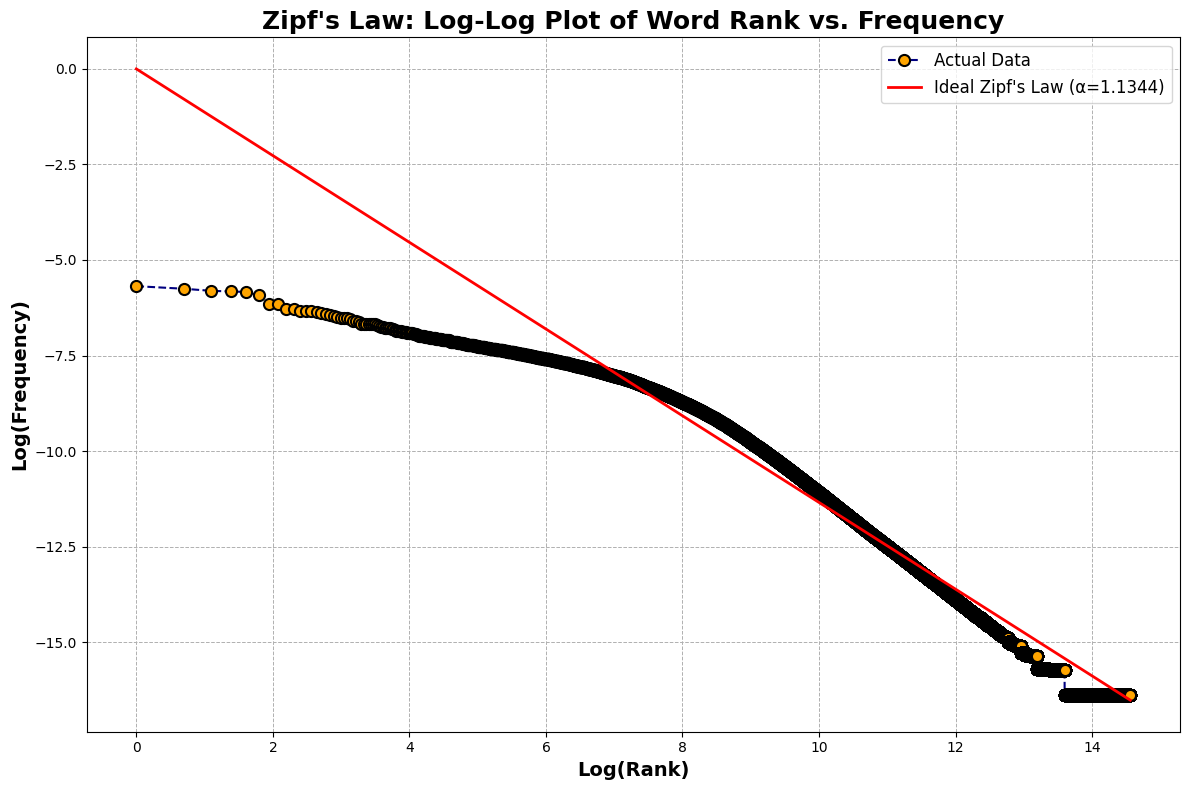

In [ ]:
# Enhanced Plot for Zipf's Law with Ideal Zipf's Law for Comparison
plt.figure(figsize=(12, 8))

# Plot the actual data
plt.plot(np.log(ranks), np.log(tf_idf_values), marker="o", linestyle="--", color='navy', markersize=8,
         markerfacecolor='orange', markeredgewidth=1.5, markeredgecolor='black', label='Actual Data')

# Calculate and plot the ideal Zipf's Law line
ideal_frequencies = 1 / (ranks**1.1344)  # Assuming alpha = 1.1344
plt.plot(np.log(ranks), np.log(ideal_frequencies), linestyle="-", color='red', linewidth=2, label="Ideal Zipf's Law (α=1.1344)")

# Add titles and labels
plt.title("Zipf's Law: Log-Log Plot of Word Rank vs. Frequency", fontsize=18, weight='bold')
plt.xlabel("Log(Rank)", fontsize=14, weight='bold')
plt.ylabel("Log(Frequency)", fontsize=14, weight='bold')

# Add grid and legend
plt.grid(True, linestyle='--', linewidth=0.7)
plt.legend(fontsize=12)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

##Print the number of tokens and the vocabulary (5 marks)

In [ ]:
# Number of Tokens (total number of words in the corpus)
print(f"Number of tokens: {total_words}")

# Vocabulary (total number of unique terms in the corpus)
vocab_size = len(combined_term_frequencies)
print(f"Vocabulary size: {vocab_size}")

print(f"Count per word on average: {total_words/vocab_size}")

Number of tokens: 134490712
Vocabulary size: 2105893
Count per word on average: 63.86398169327691


##Plot Tokens Vs Vocabulary graph using Heaps’ empirical law. Find Vocabulary count for every 10000 tokens. You may use a log scale for plotting (5 marks)

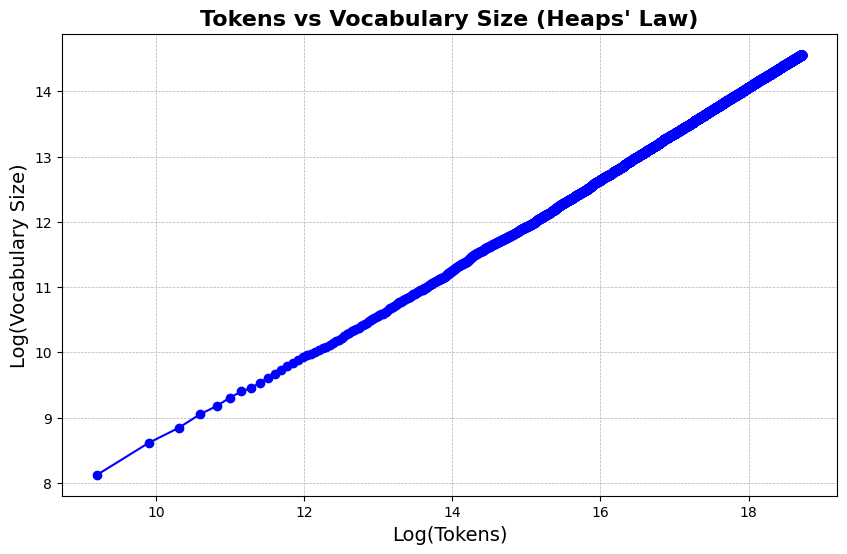

In [ ]:
# Simulated Heaps' Law for plotting tokens vs vocabulary
def heaps_law(tokens, interval=10000):
    cumulative_tokens = 0
    cumulative_vocab = set()
    token_intervals = []
    vocab_sizes = []

    for token in tokens:
        cumulative_tokens += 1
        cumulative_vocab.add(token)

        if cumulative_tokens % interval == 0:
            token_intervals.append(cumulative_tokens)
            vocab_sizes.append(len(cumulative_vocab))

    return token_intervals, vocab_sizes

# Collect all tokens from the corpus (using your existing function)
all_tokens = []
for file_path in os.listdir(processed_dir):
    full_path = os.path.join(processed_dir, file_path)
    with open(full_path, 'r', encoding='utf-8') as file:
        text = file.read()
        tokens = text.split()
        all_tokens.extend(tokens)

# Apply Heaps' Law
token_intervals, vocab_sizes = heaps_law(all_tokens, interval=10000)

# Plot Tokens vs. Vocabulary graph using log scale
plt.figure(figsize=(10, 6))
plt.plot(np.log(token_intervals), np.log(vocab_sizes), marker='o', linestyle='-', color='blue')
plt.title("Tokens vs Vocabulary Size (Heaps' Law)", fontsize=16, weight='bold')
plt.xlabel("Log(Tokens)", fontsize=14)
plt.ylabel("Log(Vocabulary Size)", fontsize=14)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

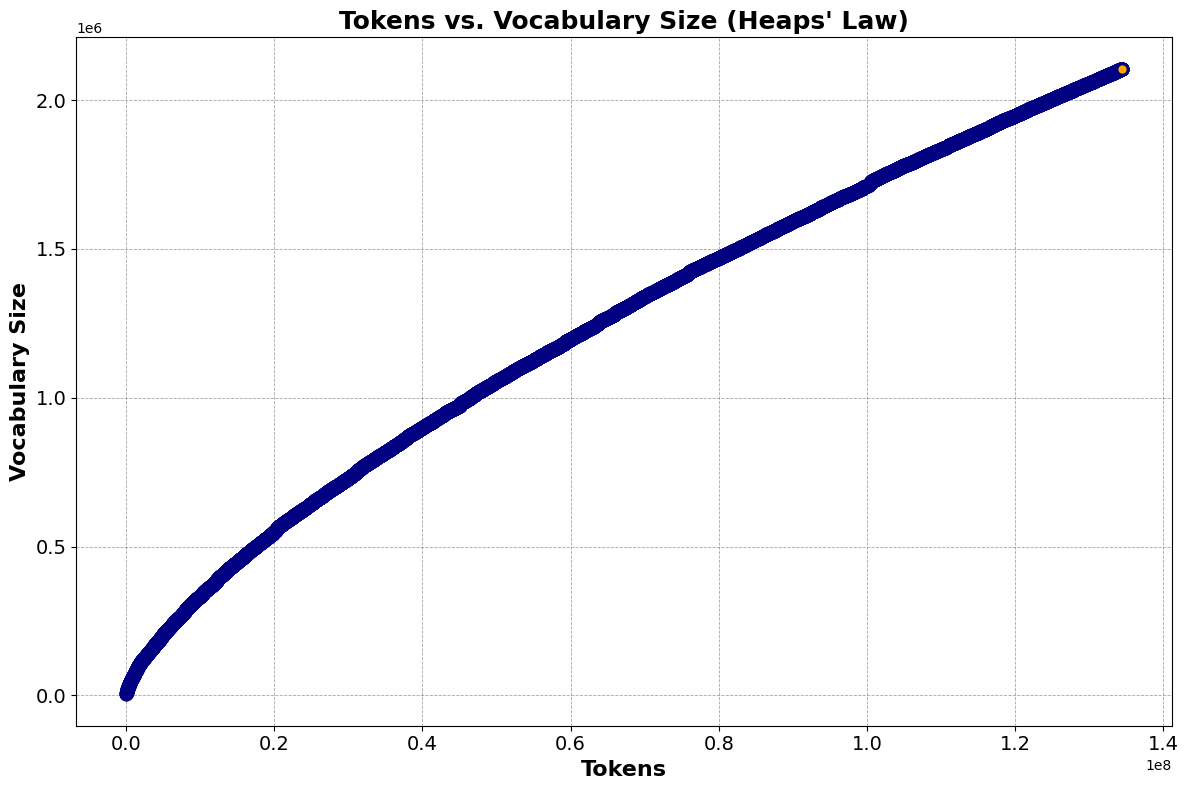

In [ ]:
# Enhanced Plot for Tokens vs. Vocabulary Size (Heaps' Law)
plt.figure(figsize=(12, 8))

# Plotting the data
plt.plot(token_intervals, vocab_sizes, marker='o', linestyle='-', color='dodgerblue', markersize=8,
         markerfacecolor='orange', markeredgewidth=2, markeredgecolor='navy')

# Adding titles and labels with enhanced fonts
plt.title("Tokens vs. Vocabulary Size (Heaps' Law)", fontsize=18, weight='bold')
plt.xlabel("Tokens", fontsize=16, weight='bold')
plt.ylabel("Vocabulary Size", fontsize=16, weight='bold')

# Setting up the grid with a subtle appearance
plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)

# Customizing the ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Adding a tight layout to avoid clipping
plt.tight_layout()

# Display the plot
plt.show()

Estimated value of β (slope): 0.7048
Estimated value of k (intercept): 3.9440


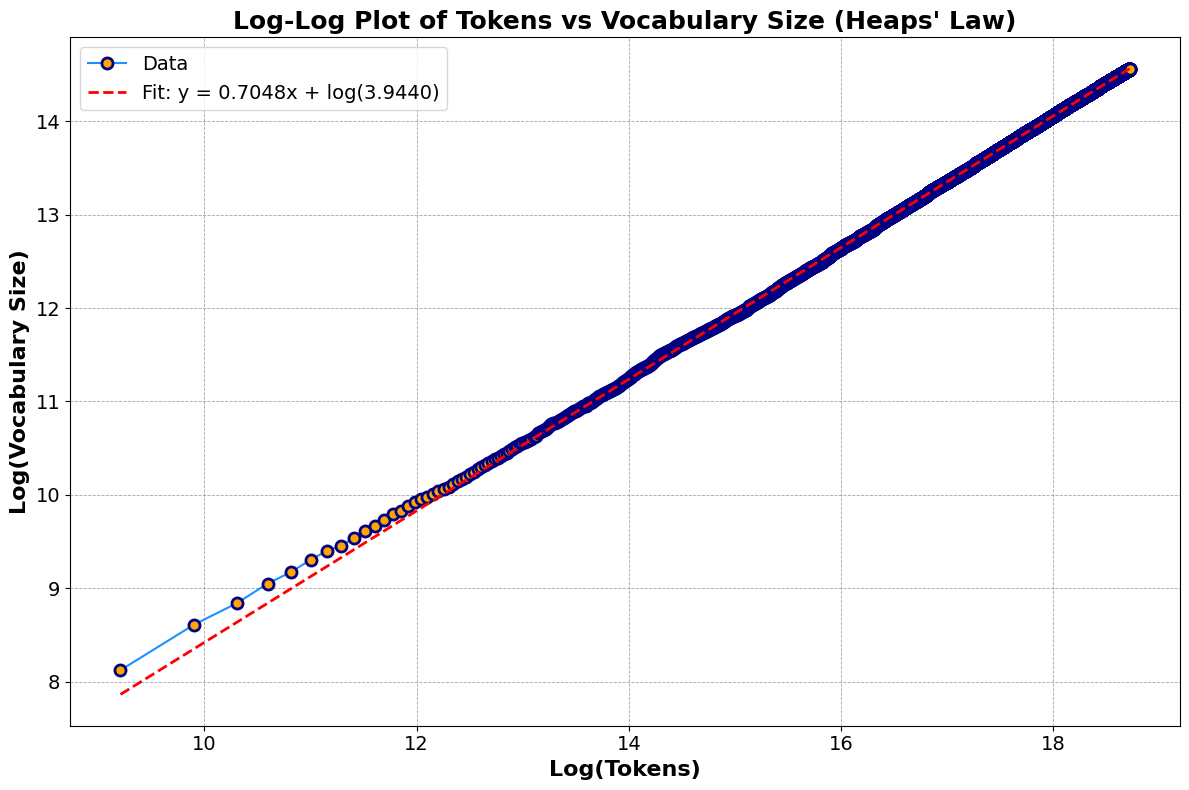

In [ ]:
# Log-transform the token intervals and vocabulary sizes
log_token_intervals = np.log(token_intervals)
log_vocab_sizes = np.log(vocab_sizes)

# Fit a linear model (y = mx + c)
slope, intercept = np.polyfit(log_token_intervals, log_vocab_sizes, 1)

# Extract beta and k
beta = slope
k = np.exp(intercept)

# Print the values of k and beta
print(f"Estimated value of β (slope): {beta:.4f}")
print(f"Estimated value of k (intercept): {k:.4f}")

# Plot the original data with the fitted line
plt.figure(figsize=(12, 8))
plt.plot(log_token_intervals, log_vocab_sizes, marker='o', linestyle='-', color='dodgerblue', markersize=8,
         markerfacecolor='orange', markeredgewidth=2, markeredgecolor='navy', label='Data')
plt.plot(log_token_intervals, slope * log_token_intervals + intercept, color='red', linestyle='--', linewidth=2, label=f'Fit: y = {beta:.4f}x + log({k:.4f})')
plt.title("Log-Log Plot of Tokens vs Vocabulary Size (Heaps' Law)", fontsize=18, weight='bold')
plt.xlabel("Log(Tokens)", fontsize=16, weight='bold')
plt.ylabel("Log(Vocabulary Size)", fontsize=16, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.6, color='gray', alpha=0.7)
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


Estimated value of β (slope): 0.7048

Estimated value of k (intercept): 3.9440